In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# df = pd.read_csv("data/final_data_one_hot.csv")
# df.head(3)

In [6]:
df = pd.read_csv("data/final_data_average_lists.csv")
df.head(3)

,runtime,audience_rating,G,NC17,NR,PG,PG-13,R,Action & Adventure,Animation,...,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western,directors,actors,production_company
0,119.0,53.0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,115.0,762.75,2.0
1,90.0,64.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,490.0,217.50,5.0
2,109.0,37.0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,53.0,543.50,1.0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df.drop(columns=['audience_rating'])
y = df['audience_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=69)

In [8]:
# from sklearn.linear_model import LinearRegression
# from sklearn.impute import SimpleImputer
# import ast
# import numpy as np
# from sklearn.preprocessing import MultiLabelBinarizer


# model = LinearRegression()

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# r2 = r2_score(y_test, y_pred)

# print(r2)


In [9]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, confusion_matrix

# model = LogisticRegression()

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# print(accuracy_score(y_pred, y_test))
# print(confusion_matrix(y_pred, y_test))

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae_errors = []
mse_errors = []
for k in range(1, 50):
  knn = KNeighborsClassifier(n_neighbors=k)

  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)


  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)


  mae_errors.append(mae)
  mse_errors.append(mse)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

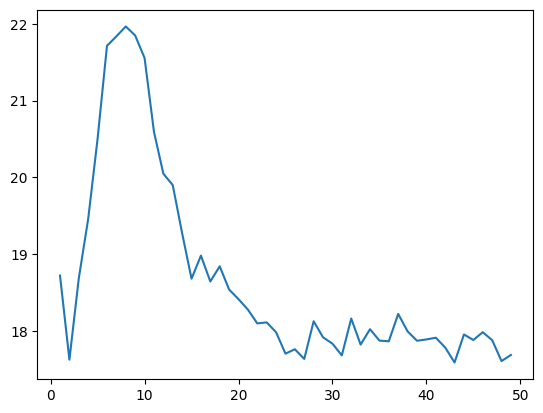

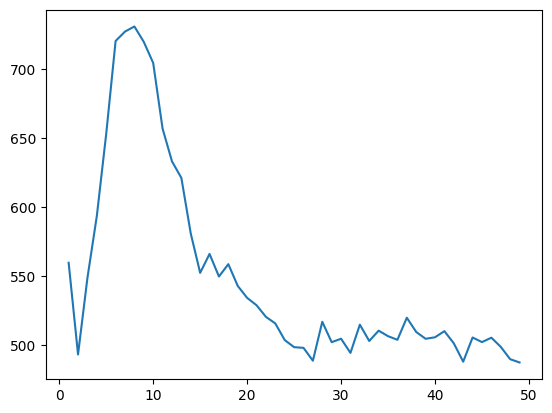

In [ ]:
plt.plot(range(1, 50), mae_errors)
plt.show()
plt.plot(range(1, 50), mse_errors)
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
data = {
  'name': 'A Minecraft Movie',
  'directors': ['Jared Hess'],
  'actors': ['Jack Black',
             'Emma Myers', 
             'Jemaine Clement',
             'Jason Momoa',
             'Jennifer Coolidge'
             'Kate McKinnon',
             'Danielle Brooks',
             'Sebastian Hansen'
            ],
  'production_company': 'Warner Bros. Pictures', # it looks like production company is actually the distributor
  'genres': ['Kids & Family', 'Action & Adventure', 'Science Fiction & Fantasy'],
  'content_rating': 'PG-13', # not final but likely
  'runtime': '100', # runtime not released yet, so use average
}

In [ ]:
import json

with open('data/director_encoding.json', 'r') as file:
    director_encoding = json.load(file)

with open('data/actor_encoding.json', 'r') as file:
    actor_encoding = json.load(file)

with open('data/production_company_encoding.json', 'r') as file:
    production_company_encoding = json.load(file)

columns = df.drop('audience_rating', axis=1).columns

def encode(data):

  new_row = {}

  if 'directors' in data:
    for director in data['directors']:
      if director in director_encoding:
        encoding = director_encoding[director]
        new_row[f'director{encoding}'] = 1

  if 'actors' in data:
    for actor in data['actors']:
      if actor in actor_encoding:
        encoding = actor_encoding[actor]
        new_row[f'actor{encoding}'] = 1

  if 'production_company' in data:
    production_company = data['production_company']
    if production_company in production_company_encoding:
      encoding = production_company_encoding[production_company]
      new_row[f'production{encoding}'] = 1
  
  if 'genres' in data:
    for genre in data['genres']:
      if genre in columns:
        new_row[genre] = 1

  if 'content_rating' in data:
    content_rating = data['content_rating']
    if content_rating in columns:
      new_row[content_rating] = 1

  if 'runtime' in data:
     new_row['runtime'] = data['runtime']

  print(new_row)
  new_row = pd.DataFrame(new_row, index=[0])
  new_row = new_row.reindex(columns=columns, fill_value=0)

  return new_row
    
  # df = pd.concat([new_df, new_row], ignore_index=True)

new_data = encode(data)

new_data

{'director281': 1, 'actor102': 1, 'actor769': 1, 'production1': 1, 'Kids & Family': 1, 'Action & Adventure': 1, 'Science Fiction & Fantasy': 1, 'PG-13': 1, 'runtime': '100'}


,runtime,G,NC17,NR,PG,PG-13,R,Action & Adventure,Animation,Anime & Manga,Art House & International,Classics,Comedy,Cult Movies,Documentary,Drama,Faith & Spirituality,Gay & Lesbian,Horror,Kids & Family,Musical & Performing Arts,Mystery & Suspense,Romance,Science Fiction & Fantasy,Special Interest,Sports & Fitness,Television,Western,actor1,actor10,actor100,actor1000,actor1001,actor1002,actor1003,actor1004,actor1005,actor1006,actor1007,actor1008,...,production963,production964,production965,production966,production967,production968,production969,production97,production970,production971,production972,production973,production974,production975,production976,production977,production978,production979,production98,production980,production981,production982,production983,production984,production985,production986,production987,production988,production989,production99,production990,production991,production992,production993,production994,production995,production996,production997,production998,production999
0,100,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_pred = knn.predict(new_data)

new_pred

array([55.])